In [0]:
%pip install folium


Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/jjagani@gmu.edu/NYPD.csv")

In [0]:
df1.na.drop().show()

+----------+-----------+-----+-------------------+-----+--------------+----------+----------+-----------+---------------+-----------------+---------+--------+--------------+----------+----------+----------------+-----------------+------------------------+
|ARREST_KEY|ARREST_DATE|PD_CD|            PD_DESC|KY_CD|     OFNS_DESC|  LAW_CODE|LAW_CAT_CD|ARREST_BORO|ARREST_PRECINCT|JURISDICTION_CODE|AGE_GROUP|PERP_SEX|     PERP_RACE|X_COORD_CD|Y_COORD_CD|        Latitude|        Longitude|New Georeferenced Column|
+----------+-----------+-----+-------------------+-----+--------------+----------+----------+-----------+---------------+-----------------+---------+--------+--------------+----------+----------+----------------+-----------------+------------------------+
| 263238742| 02/08/2023|  380|ROBBERY,CAR JACKING|  105|       ROBBERY|PL 1601003|         F|          K|             62|                0|    25-44|       F|         WHITE|    989904|    156928|       40.597407|       -73.979638|  

In [0]:
df1.printSchema()

root
 |-- ARREST_KEY: string (nullable = true)
 |-- ARREST_DATE: string (nullable = true)
 |-- PD_CD: string (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- KY_CD: string (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- LAW_CODE: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- ARREST_BORO: string (nullable = true)
 |-- ARREST_PRECINCT: string (nullable = true)
 |-- JURISDICTION_CODE: string (nullable = true)
 |-- AGE_GROUP: string (nullable = true)
 |-- PERP_SEX: string (nullable = true)
 |-- PERP_RACE: string (nullable = true)
 |-- X_COORD_CD: string (nullable = true)
 |-- Y_COORD_CD: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- New Georeferenced Column: string (nullable = true)



In [0]:
from pyspark.sql import functions as F

# Group by borough and count the number of arrests
arrests_by_borough = df1.groupBy("ARREST_BORO").agg(F.count("ARREST_KEY").alias("arrest_count"))

# Show the results
arrests_by_borough.show()

+-----------+------------+
|ARREST_BORO|arrest_count|
+-----------+------------+
|          K|       31104|
|          Q|       23922|
|          B|       26757|
|          M|       25902|
|          S|        4886|
+-----------+------------+



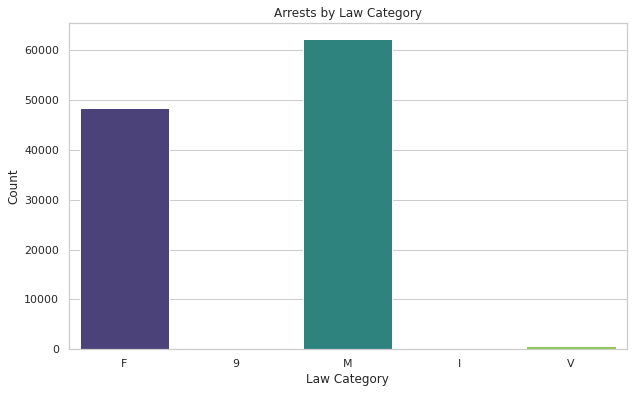

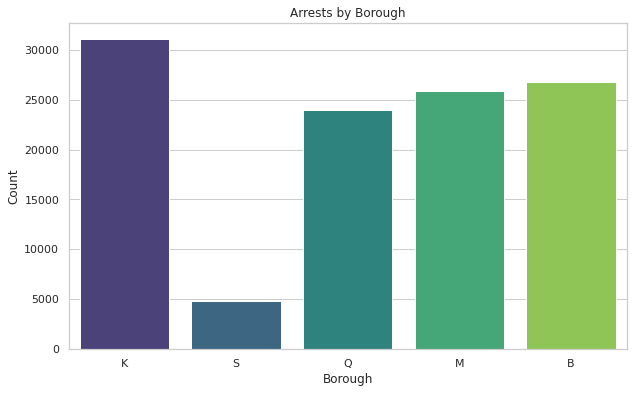

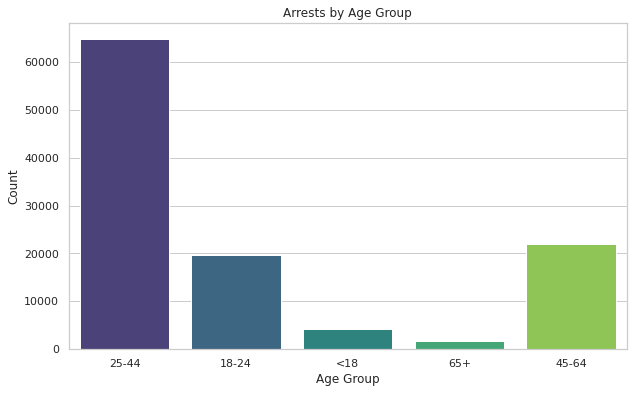

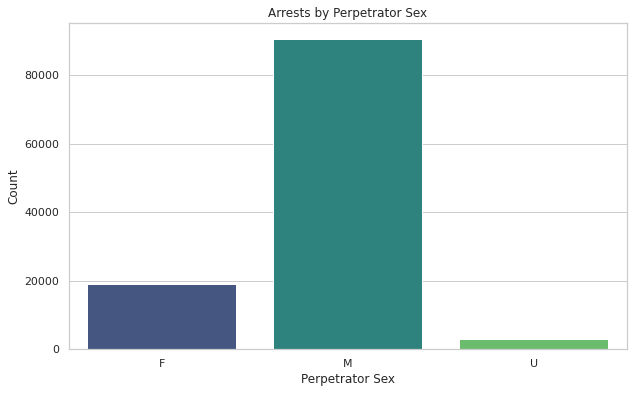

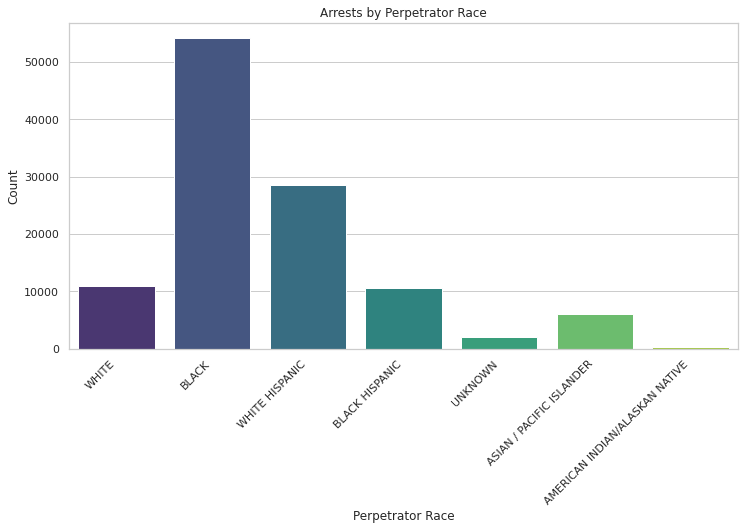

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your PySpark DataFrame

# Set the style for seaborn
sns.set(style="whitegrid")

# Bar chart for Law Categories
plt.figure(figsize=(10, 6))
sns.countplot(x="LAW_CAT_CD", data=df1.toPandas(), palette="viridis")
plt.title("Arrests by Law Category")
plt.xlabel("Law Category")
plt.ylabel("Count")
plt.show()

# Bar chart for Borough-wise arrests
plt.figure(figsize=(10, 6))
sns.countplot(x="ARREST_BORO", data=df1.toPandas(), palette="viridis")
plt.title("Arrests by Borough")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.show()

# Bar chart for Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(x="AGE_GROUP", data=df1.toPandas(), palette="viridis")
plt.title("Arrests by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Bar chart for Perpetrator Sex
plt.figure(figsize=(10, 6))
sns.countplot(x="PERP_SEX", data=df1.toPandas(), palette="viridis")
plt.title("Arrests by Perpetrator Sex")
plt.xlabel("Perpetrator Sex")
plt.ylabel("Count")
plt.show()

# Bar chart for Perpetrator Race with rotated x-axis labels
plt.figure(figsize=(12, 6))
sns.countplot(x="PERP_RACE", data=df1.toPandas(), palette="viridis")
plt.title("Arrests by Perpetrator Race")
plt.xlabel("Perpetrator Race")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.show()

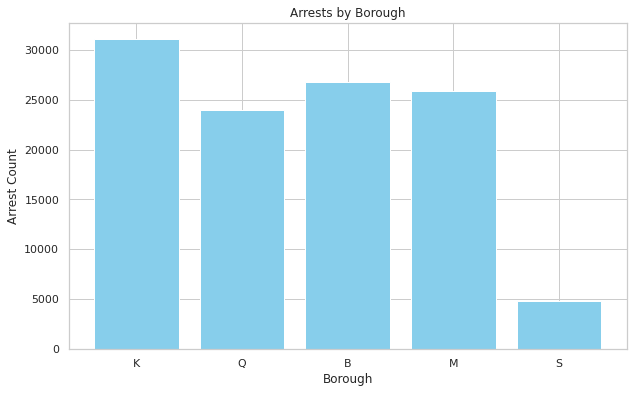

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming arrests_by_borough is your PySpark DataFrame
arrests_pd = arrests_by_borough.toPandas()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(arrests_pd["ARREST_BORO"], arrests_pd["arrest_count"], color='skyblue')
plt.title("Arrests by Borough")
plt.xlabel("Borough")
plt.ylabel("Arrest Count")
plt.show()


+-----------------------------------------+-----------+
|PD_DESC                                  |crime_count|
+-----------------------------------------+-----------+
|ASSAULT 3                                |12104      |
|LARCENY,PETIT FROM OPEN AREAS,           |12027      |
|ASSAULT 2,1,UNCLASSIFIED                 |7818       |
|TRAFFIC,UNCLASSIFIED MISDEMEAN           |6350       |
|ROBBERY,OPEN AREA UNCLASSIFIED           |5333       |
|PUBLIC ADMINISTRATION,UNCLASSI           |4690       |
|LARCENY,GRAND FROM OPEN AREAS, UNATTENDED|4314       |
|CONTROLLED SUBSTANCE, POSSESSI           |3852       |
|MENACING,UNCLASSIFIED                    |2886       |
|BURGLARY,UNCLASSIFIED,UNKNOWN            |2854       |
+-----------------------------------------+-----------+
only showing top 10 rows



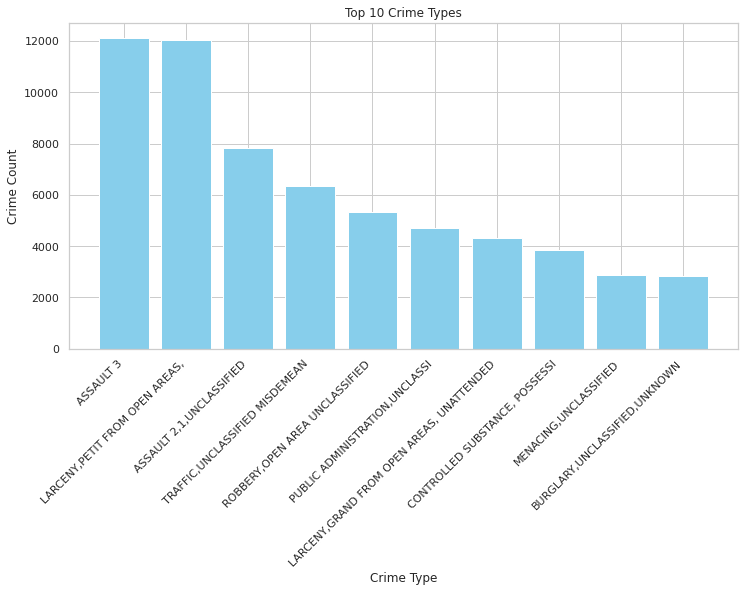

+-----------+------------------------------+-----------+
|ARREST_BORO|PD_DESC                       |crime_count|
+-----------+------------------------------+-----------+
|K          |CONSPIRACY 6, 5               |5          |
|K          |CRIMINAL MISCHIEF 4TH, GRAFFIT|176        |
|S          |LEAVING SCENE-ACCIDENT-PERSONA|8          |
|Q          |PROSTITUTION 4,PROMOTING&SECUR|6          |
|M          |ACCOSTING,FRAUDULENT          |24         |
|K          |DISORDERLY CONDUCT            |12         |
|B          |MAKING TERRORISTIC THREAT     |13         |
|K          |RAPE 3                        |39         |
|B          |NY STATE LAWS,UNCLASSIFIED VIO|62         |
|K          |CHILD ABANDONMENT             |7          |
+-----------+------------------------------+-----------+
only showing top 10 rows

<Figure size 864x432 with 0 Axes>

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd

# Create a PySpark session
spark = SparkSession.builder.appName("CrimeTypeAnalysis").getOrCreate()

# Assuming df1 is your DataFrame containing crime data
df1.createOrReplaceTempView("crimes")

# Explore the distribution of crime types
crime_types_distribution = spark.sql("""
    SELECT PD_DESC, COUNT(ARREST_KEY) as crime_count
    FROM crimes
    GROUP BY PD_DESC
    ORDER BY crime_count DESC
""")

# Show the top crime types
crime_types_distribution.show(10, truncate=False)

# Visualize the top crime types
crime_types_pd = crime_types_distribution.limit(10).toPandas()

plt.figure(figsize=(12, 6))
plt.bar(crime_types_pd["PD_DESC"], crime_types_pd["crime_count"], color='skyblue')
plt.title("Top 10 Crime Types")
plt.xlabel("Crime Type")
plt.ylabel("Crime Count")
plt.xticks(rotation=45, ha='right')
plt.show()

# Explore crime distribution by borough
crime_by_borough = spark.sql("""
    SELECT ARREST_BORO, PD_DESC, COUNT(ARREST_KEY) as crime_count
    FROM crimes
    GROUP BY ARREST_BORO, PD_DESC
""")

# Show crime distribution by borough
crime_by_borough.show(10, truncate=False)

# Visualize crime distribution by borough for a specific crime type
specific_crime_type = "PETIT LARCENY"  # Change to your desired crime type
crime_for_specific_type = crime_by_borough.filter(F.col("PD_DESC") == specific_crime_type).toPandas()

plt.figure(figsize=(12, 6))
for borough, data in crime_for_specific_type.groupby("ARREST_BORO"):
    plt.bar(data["PD_DESC"], data["crime_count"], label=borough)





+------------------------+---------+--------------------------------+-----------+
|PERP_RACE               |AGE_GROUP|PD_DESC                         |crime_count|
+------------------------+---------+--------------------------------+-----------+
|BLACK                   |25-44    |SEX TRAFFICKING                 |7          |
|BLACK                   |65+      |ASSAULT 2,1,UNCLASSIFIED        |70         |
|BLACK HISPANIC          |18-24    |CRIMINAL MISCHIEF,UNCLASSIFIED 4|38         |
|BLACK HISPANIC          |45-64    |BAIL JUMPING 1 & 2              |5          |
|WHITE                   |25-44    |TRAFFIC,UNCLASSIFIED MISDEMEAN  |250        |
|BLACK                   |25-44    |CHILD, ENDANGERING WELFARE      |444        |
|WHITE                   |25-44    |PUBLIC ADMINISTATION,UNCLASS M  |41         |
|BLACK HISPANIC          |25-44    |CHILD, ENDANGERING WELFARE      |87         |
|ASIAN / PACIFIC ISLANDER|18-24    |MENACING,UNCLASSIFIED           |22         |
|ASIAN / PACIFIC

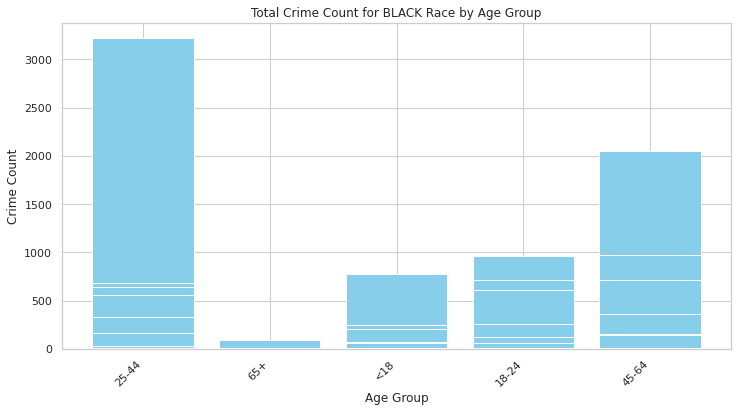

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import pandas as pd

# Create a PySpark session
spark = SparkSession.builder.appName("DemographicOffenseAnalysis").getOrCreate()

# Assuming df1 is your DataFrame containing the necessary columns
df1.createOrReplaceTempView("demographic_offense_data")

# Explore the relationships between race, age groups, and types of offenses
demographic_offense_analysis = spark.sql("""
    SELECT PERP_RACE, AGE_GROUP, PD_DESC, COUNT(ARREST_KEY) as crime_count
    FROM demographic_offense_data
    GROUP BY PERP_RACE, AGE_GROUP, PD_DESC
""")

# Show the top rows of the analysis
demographic_offense_analysis.show(10, truncate=False)

# Visualize the relationships for a specific race and age group
specific_race = "BLACK"  # Change to your desired race
specific_age_group = "18-24"  # Change to your desired age group

crime_for_specific_race = demographic_offense_analysis.filter(
    F.col("PERP_RACE") == specific_race
).toPandas()

plt.figure(figsize=(12, 6))
plt.bar(crime_for_specific_race["AGE_GROUP"], crime_for_specific_race["crime_count"], color='skyblue')
plt.title(f"Total Crime Count for {specific_race} Race by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Crime Count")
plt.xticks(rotation=45, ha='right')
plt.show()
  


In [0]:
'''
from pyspark.ml.classification import LogisticRegression

# Create a LogisticRegression model
logistic_regression = LogisticRegression(featuresCol="features", labelCol="LAW_CAT_CD_index", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Create a pipeline with the VectorAssembler and LogisticRegression
pipeline_lr = Pipeline(stages=indexers + [assembler, logistic_regression])

# Fit the pipeline to the training data
model_lr = pipeline_lr.fit(training_data)

evaluator = MulticlassClassificationEvaluator(labelCol="LAW_CAT_CD_index", predictionCol="prediction", metricName="accuracy")

# Make predictions on the testing data
predictions_lr = model_lr.transform(testing_data)

# Evaluate the Logistic Regression model
accuracy_lr = evaluator.evaluate(predictions_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr}")

'''

Out[9]: '\nfrom pyspark.ml.classification import LogisticRegression\n\n# Create a LogisticRegression model\nlogistic_regression = LogisticRegression(featuresCol="features", labelCol="LAW_CAT_CD_index", maxIter=10, regParam=0.3, elasticNetParam=0.8)\n\n# Create a pipeline with the VectorAssembler and LogisticRegression\npipeline_lr = Pipeline(stages=indexers + [assembler, logistic_regression])\n\n# Fit the pipeline to the training data\nmodel_lr = pipeline_lr.fit(training_data)\n\nevaluator = MulticlassClassificationEvaluator(labelCol="LAW_CAT_CD_index", predictionCol="prediction", metricName="accuracy")\n\n# Make predictions on the testing data\npredictions_lr = model_lr.transform(testing_data)\n\n# Evaluate the Logistic Regression model\naccuracy_lr = evaluator.evaluate(predictions_lr)\n\nprint(f"Logistic Regression Accuracy: {accuracy_lr}")\n\n'

In [0]:
'''

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Assuming predictions is the DataFrame with the "prediction" and "features" columns
predictions_pd = predictions.select("prediction", "features").toPandas()

# Extract individual components of the "features" column
for i in range(len(predictions_pd['features'][0])):
    predictions_pd[f'feature_{i}'] = predictions_pd['features'].apply(lambda x: x[i])

# Drop the original "features" column
predictions_pd = predictions_pd.drop(columns=['features'])

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(predictions_pd.iloc[:, 2:])

# Add the PCA components to the DataFrame
predictions_pd['PCA1'] = pca_result[:, 0]
predictions_pd['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_label in predictions_pd['prediction'].unique():
    cluster_data = predictions_pd[predictions_pd['prediction'] == cluster_label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_label}')

plt.title('K-Means Clustering Result')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

'''


Out[10]: '\n\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nimport pandas as pd\n\n# Assuming predictions is the DataFrame with the "prediction" and "features" columns\npredictions_pd = predictions.select("prediction", "features").toPandas()\n\n# Extract individual components of the "features" column\nfor i in range(len(predictions_pd[\'features\'][0])):\n    predictions_pd[f\'feature_{i}\'] = predictions_pd[\'features\'].apply(lambda x: x[i])\n\n# Drop the original "features" column\npredictions_pd = predictions_pd.drop(columns=[\'features\'])\n\n# Apply PCA to reduce dimensionality to 2D\npca = PCA(n_components=2)\npca_result = pca.fit_transform(predictions_pd.iloc[:, 2:])\n\n# Add the PCA components to the DataFrame\npredictions_pd[\'PCA1\'] = pca_result[:, 0]\npredictions_pd[\'PCA2\'] = pca_result[:, 1]\n\n# Plot the clusters\nplt.figure(figsize=(10, 6))\nfor cluster_label in predictions_pd[\'prediction\'].unique():\n    cluster_data = predictions_pd[predi

In [0]:
df1.printSchema()

root
 |-- ARREST_KEY: string (nullable = true)
 |-- ARREST_DATE: string (nullable = true)
 |-- PD_CD: string (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- KY_CD: string (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- LAW_CODE: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- ARREST_BORO: string (nullable = true)
 |-- ARREST_PRECINCT: string (nullable = true)
 |-- JURISDICTION_CODE: string (nullable = true)
 |-- AGE_GROUP: string (nullable = true)
 |-- PERP_SEX: string (nullable = true)
 |-- PERP_RACE: string (nullable = true)
 |-- X_COORD_CD: string (nullable = true)
 |-- Y_COORD_CD: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- New Georeferenced Column: string (nullable = true)



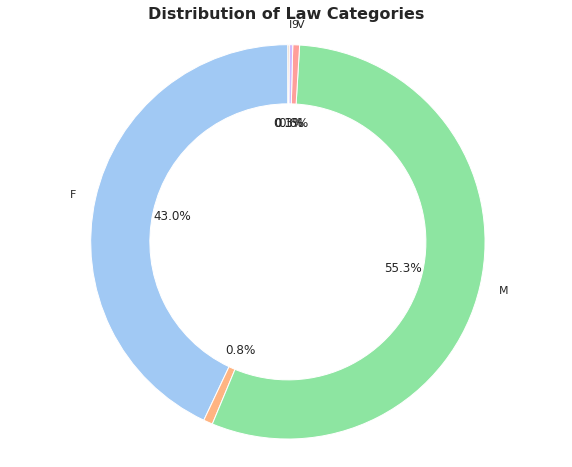

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your PySpark DataFrame
law_category_distribution = df1.groupBy("LAW_CAT_CD").count().toPandas()

# Set a color palette for the pie chart
colors = sns.color_palette('pastel')[0:len(law_category_distribution)]

# Plot a pie chart with attractive styling
plt.figure(figsize=(10, 8))
plt.pie(law_category_distribution["count"], labels=law_category_distribution["LAW_CAT_CD"], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title("Distribution of Law Categories", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

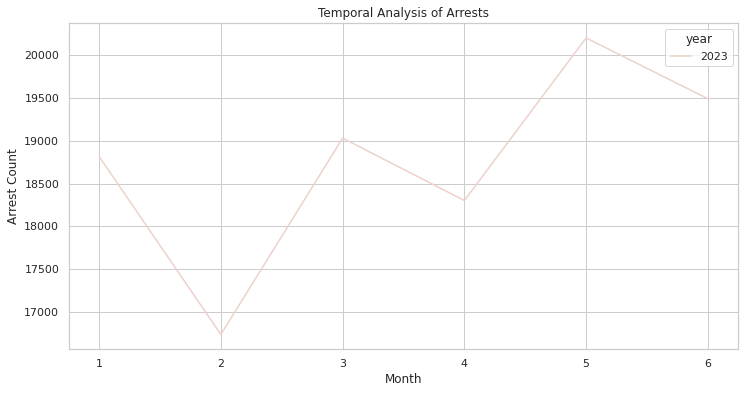

In [0]:
# Assuming df1 is your PySpark DataFrame and you have a date-related column like "ARREST_DATE"
# Convert "ARREST_DATE" to a suitable date format, if needed
df1 = df1.withColumn("ARREST_DATE", F.to_date(df1["ARREST_DATE"], 'MM/dd/yyyy'))

# Extract year and month from the date
df1 = df1.withColumn("year", F.year("ARREST_DATE"))
df1 = df1.withColumn("month", F.month("ARREST_DATE"))

# Group by year and month and count arrests
temporal_analysis = df1.groupBy("year", "month").count().orderBy("year", "month").toPandas()

# Plot a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="count", hue="year", data=temporal_analysis)
plt.title("Temporal Analysis of Arrests")
plt.xlabel("Month")
plt.ylabel("Arrest Count")
plt.show()

+----------+-----+
|LAW_CAT_CD|count|
+----------+-----+
|         F|48396|
|      null|  846|
|         M|62259|
|         V|  624|
|         9|  318|
|         I|  128|
+----------+-----+

Accuracy: 0.9074165803575449


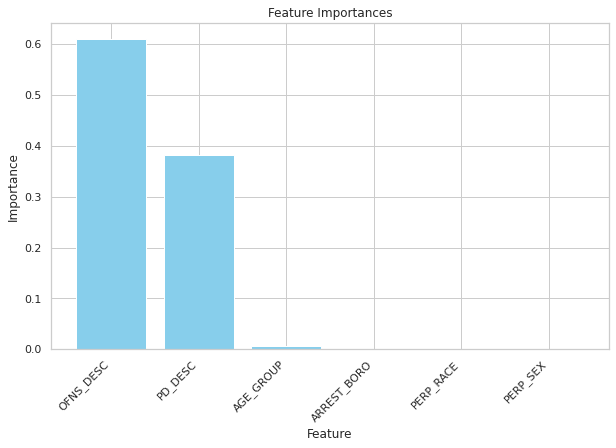

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize Spark session
spark = SparkSession.builder.appName("CrimeClassification").getOrCreate()

# Assuming df1 is your DataFrame containing the necessary columns
df1.createOrReplaceTempView("crime_data")

# Check the data in the column being indexed
df1.groupBy("LAW_CAT_CD").count().show()

# Handle missing values if necessary
df1 = df1.na.drop(subset=["LAW_CAT_CD"])

# Convert LAW_CAT_CD to a numerical factor using StringIndexer
indexer = StringIndexer(inputCol="LAW_CAT_CD", outputCol="label")
indexed_data = indexer.fit(df1).transform(df1)

# Define a list of string columns to be used as predictors
string_columns = ["PD_DESC", "OFNS_DESC", "ARREST_BORO", "AGE_GROUP", "PERP_SEX", "PERP_RACE"]

# Create a StringIndexer for each string column
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index").fit(indexed_data) for col in string_columns]

# Create a VectorAssembler to combine the indexed string columns into a feature vector
assembler = VectorAssembler(inputCols=[col + "_index" for col in string_columns], outputCol="features")

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(featuresCol="features", labelCol="label", maxBins=300, numTrees=10)

# Create a pipeline with the StringIndexers, VectorAssembler, and RandomForestClassifier
pipeline = Pipeline(stages=indexers + [assembler, rf_classifier])

# Split the data into training and testing sets
(training_data, testing_data) = indexed_data.randomSplit([0.8, 0.2], seed=42)

# Fit the pipeline to the training data
model = pipeline.fit(training_data)

# Make predictions on the testing data
predictions = model.transform(testing_data)

# Evaluate the model using accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")

# Access feature importances
feature_importances = model.stages[-1].featureImportances

# Create a Pandas DataFrame for better visualization
feature_importance_df = pd.DataFrame(list(zip(string_columns, feature_importances.toArray())),
                                     columns=["Feature", "Importance"]).sort_values("Importance", ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"], color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.show()


In [0]:
import folium
from folium.plugins import HeatMap

# Assuming df1 is your PySpark DataFrame with "Latitude" and "Longitude" columns
latitude_longitude = df1.select("Latitude", "Longitude").toPandas()

# Convert Latitude and Longitude to float
latitude_longitude["Latitude"] = latitude_longitude["Latitude"].astype(float)
latitude_longitude["Longitude"] = latitude_longitude["Longitude"].astype(float)

# Create a Folium map centered around the mean of Latitude and Longitude
map_center = [latitude_longitude["Latitude"].mean(), latitude_longitude["Longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Create a HeatMap layer
heat_data = [[row["Latitude"], row["Longitude"]] for index, row in latitude_longitude.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map
m.save("heatmap.html")  # Save the map to an HTML file

In [0]:
import folium
from folium.plugins import HeatMap

# Assuming df1 is your PySpark DataFrame with "Latitude" and "Longitude" columns
latitude_longitude = df1.select("Latitude", "Longitude").toPandas()

# Convert Latitude and Longitude to float
latitude_longitude["Latitude"] = latitude_longitude["Latitude"].astype(float)
latitude_longitude["Longitude"] = latitude_longitude["Longitude"].astype(float)

# Create a Folium map centered around the mean of Latitude and Longitude
map_center = [latitude_longitude["Latitude"].mean(), latitude_longitude["Longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Create a HeatMap layer
heat_data = [[row["Latitude"], row["Longitude"]] for index, row in latitude_longitude.iterrows()]
HeatMap(heat_data).add_to(m)

# Convert the Folium map to HTML and display it
map_html = m._repr_html_()
displayHTML(map_html)

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_5145d14bf4a7cc629a049097f08e52c5 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_5145d14bf4a7cc629a049097f08e52c5" ></div>
 
</body>
<script>
 
 
 var map_5145d14bf4a7cc629a049097f08e52c5 = L.map(
 "map_5145d14bf4a7cc629a049097f08e52c5",
 {
 center: [40.73816179037822, -73.92098667387839],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_b2b24a8ce4dbe3d211cb17b48e418201 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_b2b24a8ce4dbe3d211cb17b48e418201.addTo(map_5145d14bf4a7cc629a049097f08e52c5);
 
 var heat_map_b6add19d4bdcb14c801899d637c5e282 = L.heatLayer(
 [[40.597407, -73.979638], [40.6447209438691, -74.0770327198983], [40.6447209438691, -74.0770327198983], [40.7434812638841, -73.8740035373971], [40.6954388081238, -73.9832253756043], [40.828405, -73.940382], [40.628508, -73.941384], [40.712206, -73.825952], [40.822355, -73.911463], [40.712206, -73.825952], [40.6744956865259, -73.9305713255961], [40.890325, -73.836004], [40.68576692, -73.80663792], [40.6744956865259, -73.9305713255961], [40.8441566000203, -73.9006054489734], [40.7226409964758, -73.8515418216779], [40.878105, -73.860454], [40.628508, -73.941384], [40.712206, -73.825952], [40.671404, -73.881509], [40.762037, -73.827328], [40.7072398161698, -73.7927267255908], [40.86747548, -73.89740194], [40.5766459780433, -73.9764803960699], [40.867837, -73.831294], [40.6799807384666, -73.7762339071953], [40.777215, -73.949127], [40.769552, -73.915361], [40.712206, -73.825952], [40.6799807384666, -73.7762339071953], [40.834976, -73.863058], [40.822355, -73.911463], [40.619461, -74.027959], [40.671104, -73.913562], [40.830792, -73.826946], [40.6744956865259, -73.9305713255961], [40.674593, -73.93

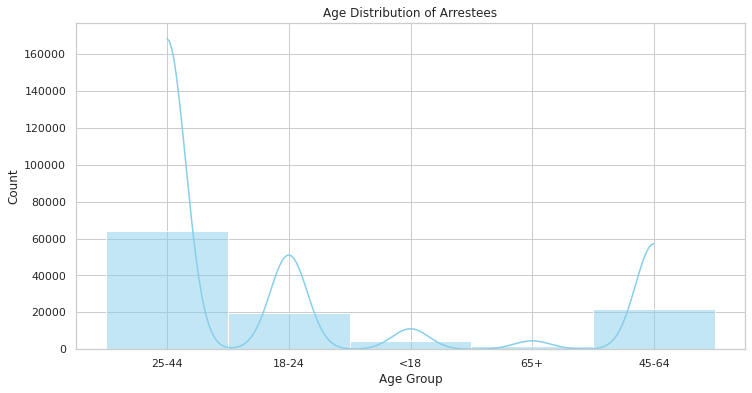

<Figure size 864x576 with 0 Axes>

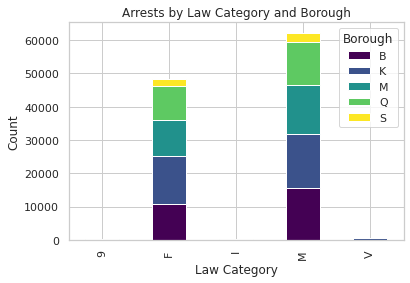

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your PySpark DataFrame

# Set the style for seaborn
sns.set(style="whitegrid")

# Histogram for Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df1.toPandas(), x="AGE_GROUP", bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Arrestees")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Stacked Bar Chart for Law Categories and Arrest Borough
law_boro_count = df1.groupBy("LAW_CAT_CD", "ARREST_BORO").count().toPandas()
law_boro_count = law_boro_count.pivot(index="LAW_CAT_CD", columns="ARREST_BORO", values="count")

plt.figure(figsize=(12, 8))
law_boro_count.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Arrests by Law Category and Borough")
plt.xlabel("Law Category")
plt.ylabel("Count")
plt.legend(title="Borough")
plt.show()




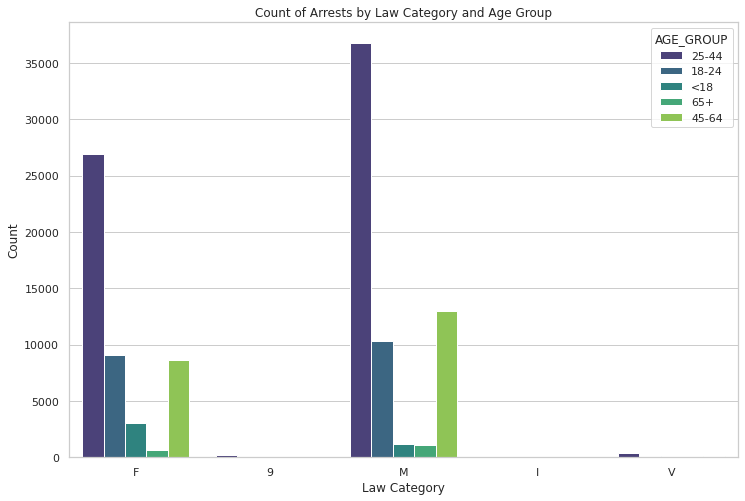

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your PySpark DataFrame

# Convert 'AGE_GROUP' to a categorical data type
df1 = df1.withColumn("AGE_GROUP", df1["AGE_GROUP"].cast("string"))

# Set the style for seaborn
sns.set(style="whitegrid")

# Count plot for Age Distribution by Law Category
plt.figure(figsize=(12, 8))
sns.countplot(x="LAW_CAT_CD", hue="AGE_GROUP", data=df1.toPandas(), palette="viridis")
plt.title("Count of Arrests by Law Category and Age Group")
plt.xlabel("Law Category")
plt.ylabel("Count")
plt.show()

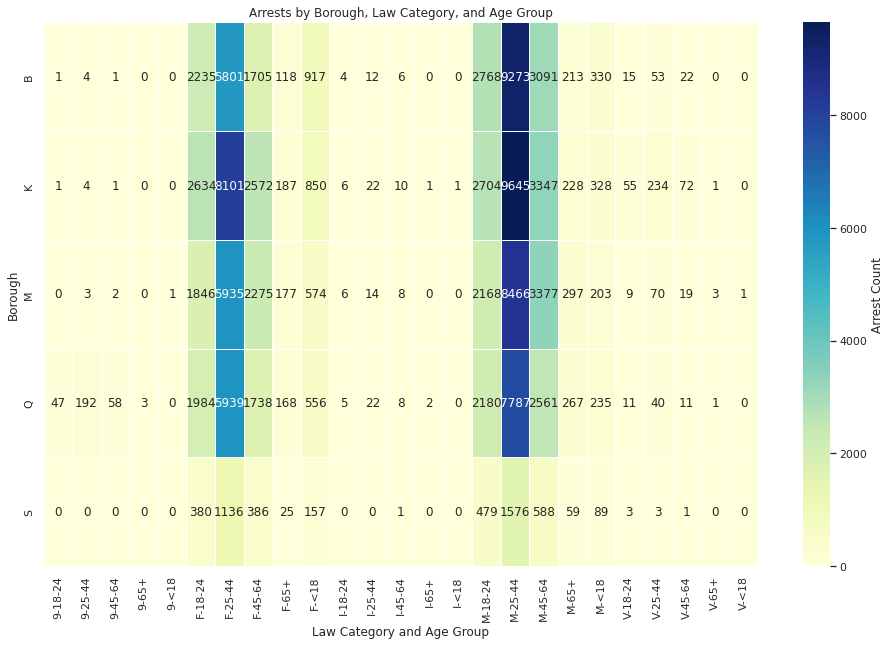

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your PySpark DataFrame

# Convert categorical columns to string type
categorical_columns = ["ARREST_BORO", "LAW_CAT_CD", "AGE_GROUP"]
for col in categorical_columns:
    df1 = df1.withColumn(col, df1[col].cast("string"))

# Create a pivot table for the heatmap
heatmap_data = df1.groupBy(*categorical_columns).count().toPandas()
heatmap_data = heatmap_data.pivot_table(index="ARREST_BORO", columns=["LAW_CAT_CD", "AGE_GROUP"], values="count", aggfunc="sum").fillna(0)

# Set up the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='g', linewidths=.5, cbar_kws={'label': 'Arrest Count'})
plt.title("Arrests by Borough, Law Category, and Age Group")
plt.xlabel("Law Category and Age Group")
plt.ylabel("Borough")
plt.show()